In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv')
df['OriceOerQual'] = df['SalePrice'] / df['OverallQual']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv')
df['PricePerQual'] = df['SalePrice'] / df['OverallQual']
df[['Id', 'SalePrice', 'OverallQual', 'PricePerQual', 'Condition1']].head()

,Id,SalePrice,OverallQual,PricePerQual,Condition1
0,1,208500,7,29785.714286,Norm
1,2,181500,6,30250.000000,Feedr
2,3,223500,7,31928.571429,Norm
3,4,140000,7,20000.000000,Norm
4,5,250000,8,31250.000000,Norm


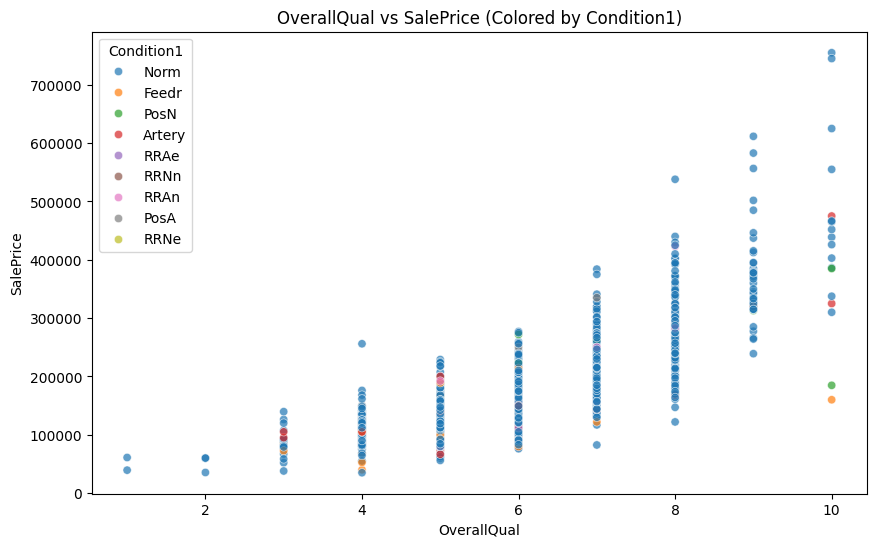

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=df, hue='Condition1', alpha=0.7)
plt.title('OverallQual vs SalePrice (Colored by Condition1)')
plt.show()

In [4]:
top_quality = df[df['OverallQual'] == 10][['Id', 'SalePrice', 'YearBuilt', 'YearRemodAdd', 'Condition1']]
print(top_quality.sort_values('SalePrice'))

        Id  SalePrice  YearBuilt  YearRemodAdd Condition1
1298  1299     160000       2008          2008      Feedr
523    524     184750       2007          2008       PosN
1442  1443     310000       2008          2008       Norm
583    584     325000       1893          2000     Artery
994    995     337500       2006          2007       Norm
825    826     385000       2007          2008       PosN
224    225     386250       2003          2003       Norm
515    516     402861       2009          2009       Norm
389    390     426000       2007          2008       Norm
58      59     438780       2006          2006       Norm
591    592     451950       2008          2008       Norm
1243  1244     465000       2006          2006       Norm
1373  1374     466500       2001          2002       Norm
185    186     475000       1892          1993     Artery
440    441     555000       2008          2008       Norm
1169  1170     625000       1995          1996       Norm
1182  1183    

In [5]:
comparison =df[df['Id'].isin([186, 584])][['Id', 'SalePrice', 'GrLivArea', 'LotArea', 'YearBuilt']]
print(comparison)

      Id  SalePrice  GrLivArea  LotArea  YearBuilt
185  186     475000       3608    22950       1892
583  584     325000       2775    13500       1893


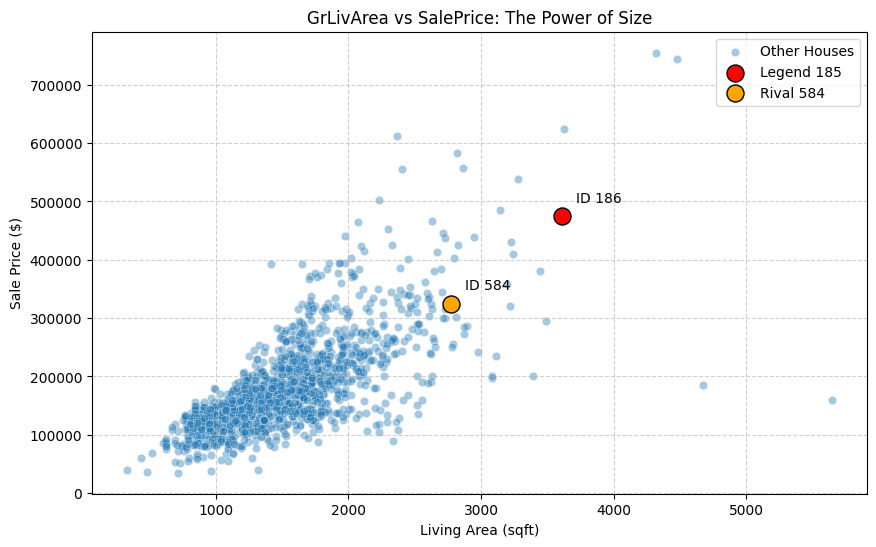

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, alpha=0.4, label='Other Houses')
special_targets = df[df['Id'].isin([186, 584])]
for i, row in special_targets.iterrows():
  color = 'red' if row['Id'] ==186 else 'orange'
  label = 'Legend 185'if row['Id'] == 186 else 'Rival 584'
  plt.scatter(row['GrLivArea'], row['SalePrice'], color=color, s=150, edgecolors='black',label=label)
  plt.annotate(f"ID {row['Id']}", (row['GrLivArea'], row['SalePrice']), xytext=(10,10), textcoords='offset points')
  plt.title('GrLivArea vs SalePrice: The Power of Size')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Sale Price ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

捜査報告書：ID 186「1892年築の古豪」の正体
今回のガサ入れにより、幹線道路沿い（Artery）という悪条件を跳ね除け、最高品質（OverallQual 10）を維持するID 186の強さの源泉を特定した。

1. 物理的な圧倒的優位性
ライバルである同条件のID 584（1893年築・Artery・品質10）と比較した結果、以下の事実が判明：

居住面積 (GrLivArea): 185番は3,608sqftと、584番（2,775sqft）を約30%上回る。

敷地面積 (LotArea): 185番は22,950sqftと、584番（13,500sqft）の約1.7倍。

2. 結論
ID 186が高い資産価値を維持している理由は、単なる保存状態の良さだけではない。**「圧倒的な広さと敷地」**という物理的パワーが、立地条件の不利を完全に打ち消しているためである。これは「面積 vs 価格」のグラフにおける明確な正の相関（Positive Correlation）からも証明される。